In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')

color_pal = sns.color_palette()

In [2]:
data = pd.read_csv('data\PJME_hourly.csv')


# Explore Data

In [3]:
data.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [5]:
data = data.set_index('Datetime')

In [6]:
data.index = pd.to_datetime(data.index)

<Axes: title={'center': 'Usage of mega watt over time'}, xlabel='Datetime'>

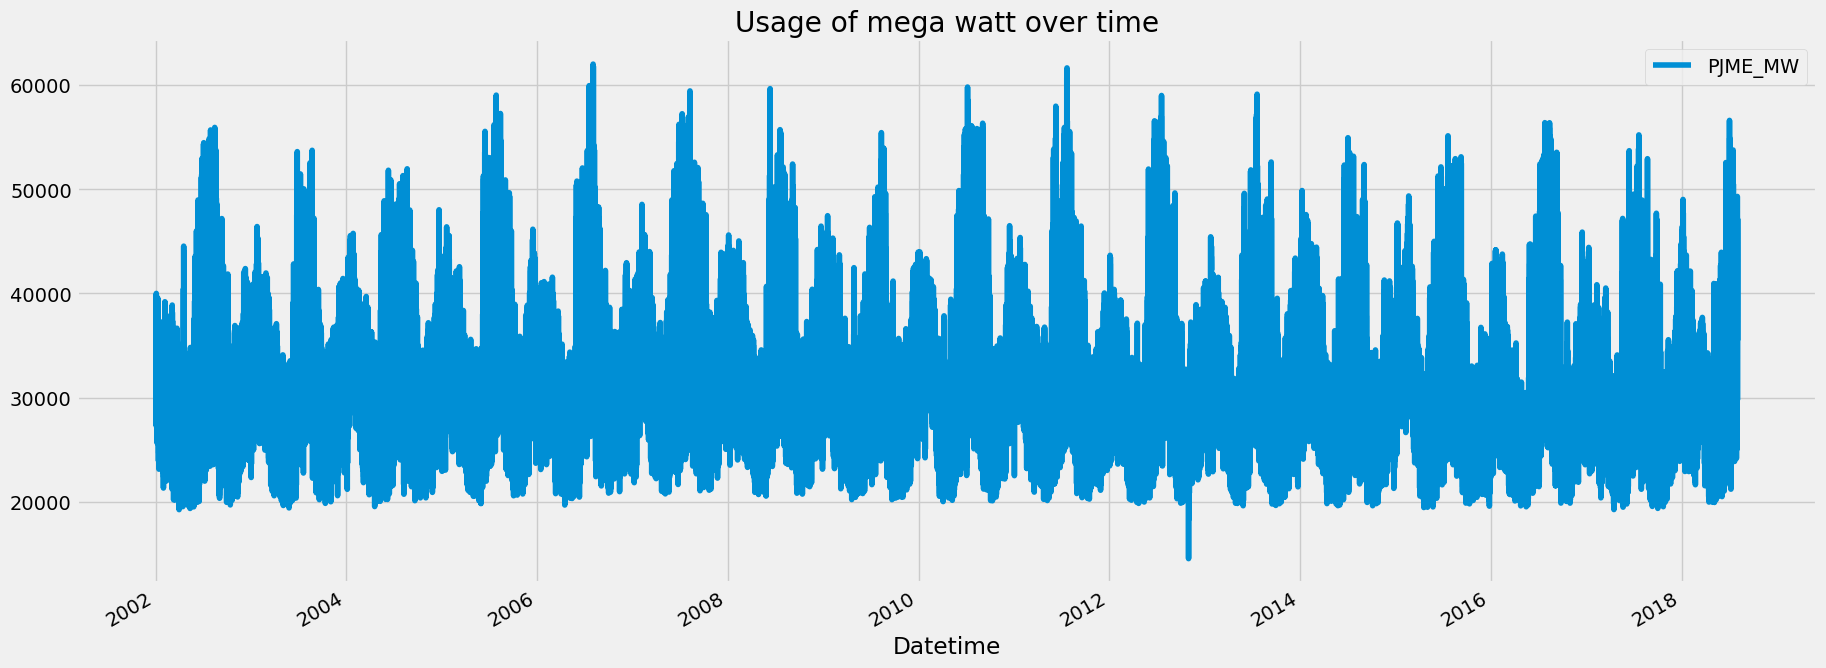

In [7]:
data.plot(figsize=(20,8),color=color_pal,title ='Usage of mega watt over time')

# Features Creating

In [8]:
# Hours - Day of week - Month - quarter -Year -Day of year

In [9]:
data['Hours'] = data.index.hour
data['Day of week'] = data.index.day_of_week
data['Month'] = data.index.month
data['quarter'] = data.index.quarter
data['Year'] = data.index.year
data['Day of year'] = data.index.day_of_year

In [10]:
data

,PJME_MW,Hours,Day of week,Month,quarter,Year,Day of year
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


Text(0.5, 1.0, 'Usage of mega watt per Hours')

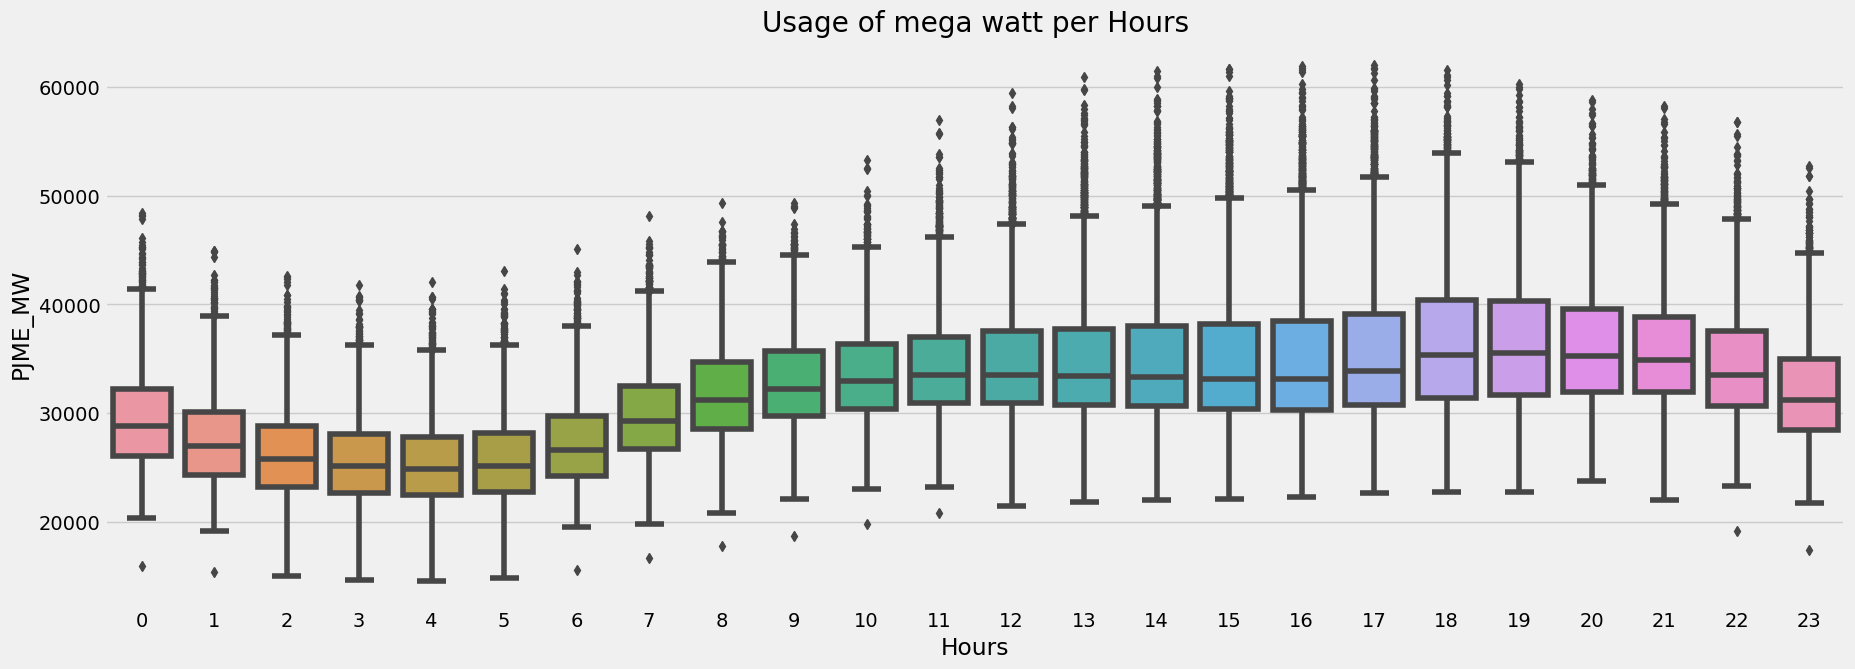

In [11]:
plt.subplots(figsize=(20,7))
sns.boxplot(data=data,x='Hours',y='PJME_MW')
plt.title('Usage of mega watt per Hours')

Text(0.5, 1.0, 'Usage of mega watt per Month')

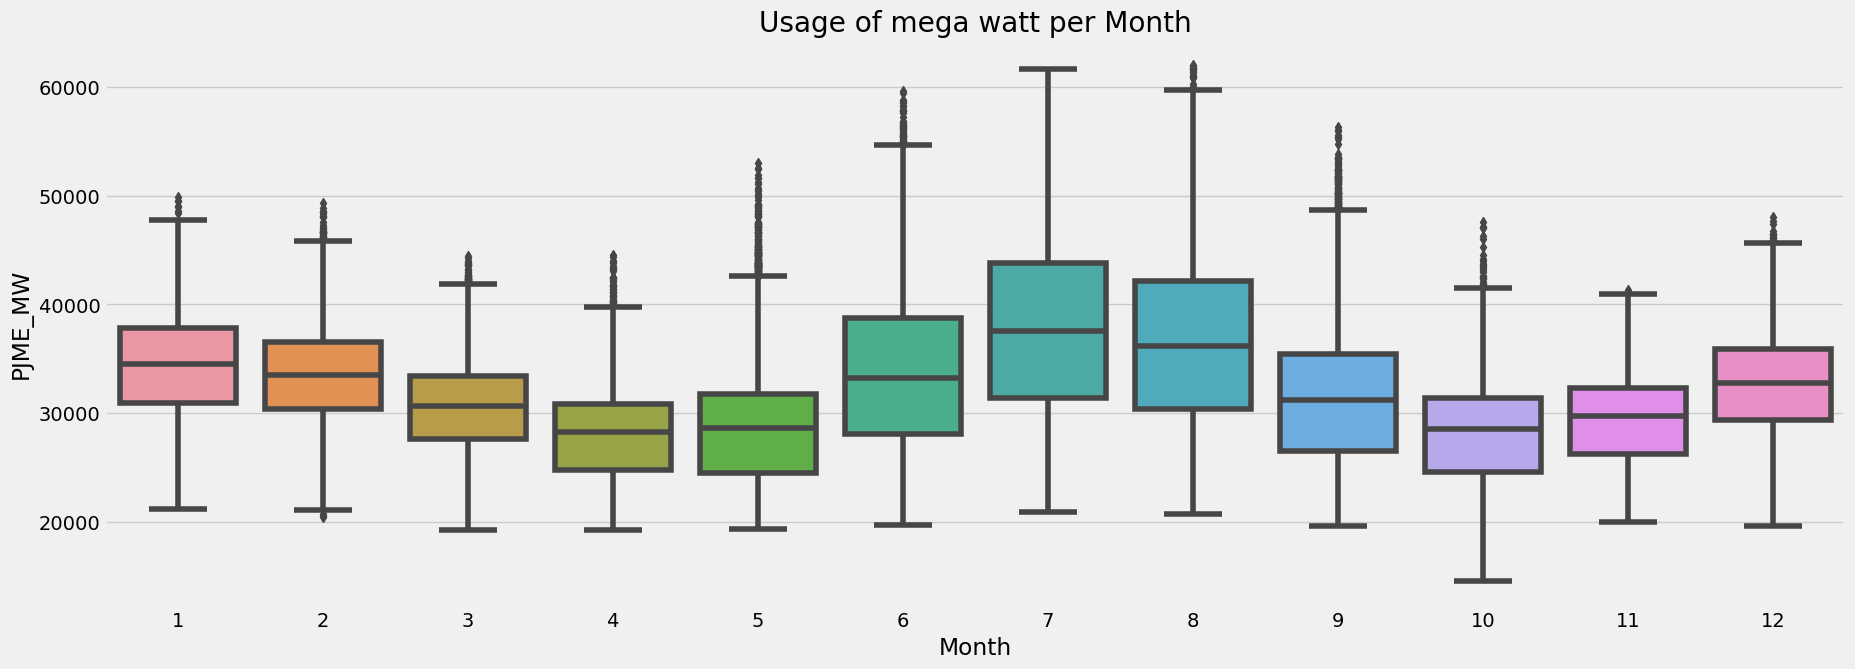

In [12]:
plt.subplots(figsize=(20,7))
sns.boxplot(data=data,x='Month',y='PJME_MW')
plt.title('Usage of mega watt per Month')

Text(0.5, 1.0, 'Usage of mega watt per quarter')

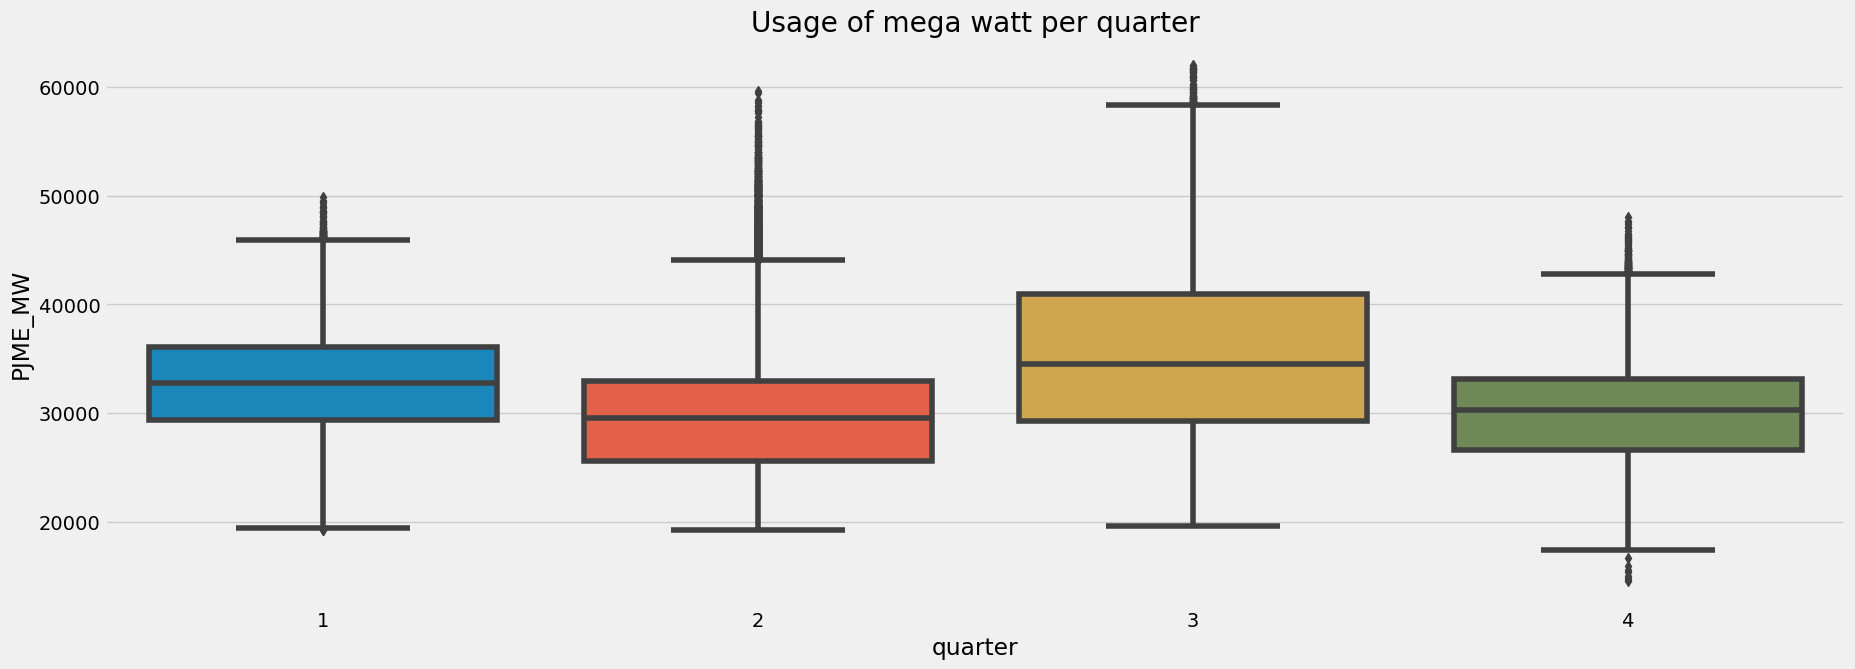

In [13]:
plt.subplots(figsize=(20,7))
sns.boxplot(data=data,x='quarter',y='PJME_MW')
plt.title('Usage of mega watt per quarter')

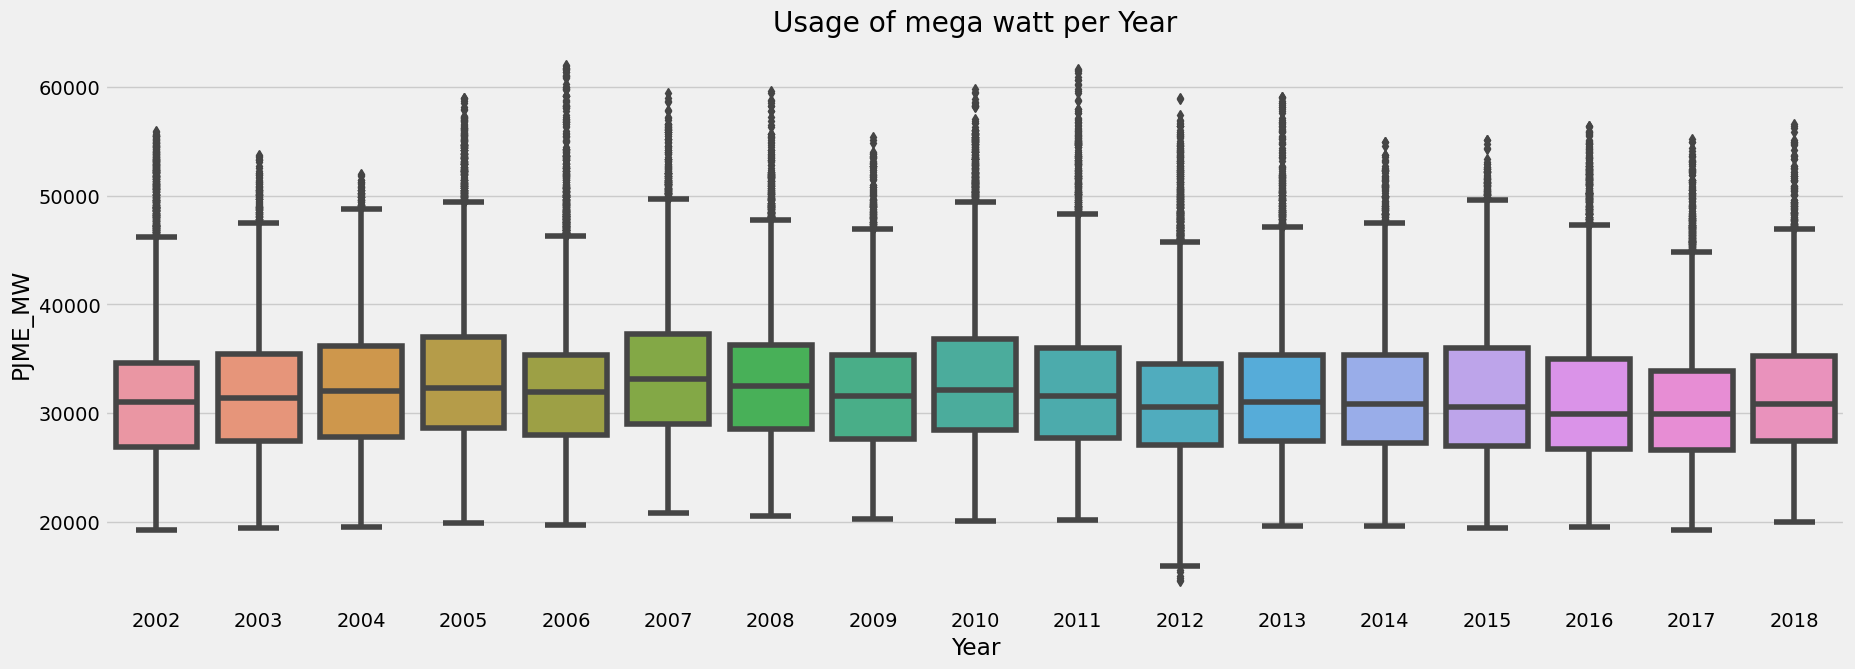

In [14]:
plt.subplots(figsize=(20,7))
sns.boxplot(data=data,x='Year',y='PJME_MW')
plt.title('Usage of mega watt per Year')
plt.show()


Text(0.5, 1.0, 'Usage of mega watt per Day of week')

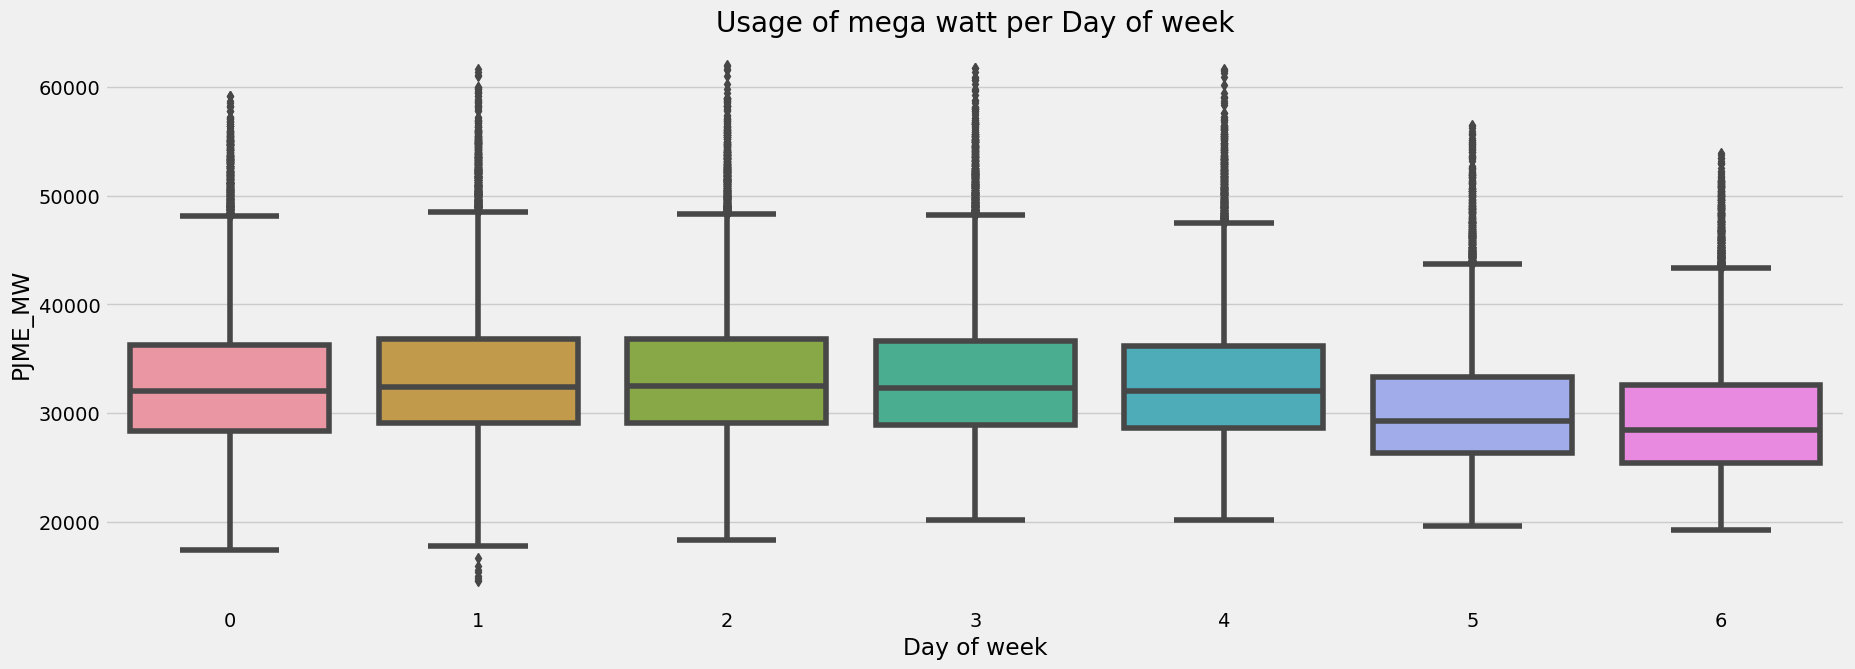

In [15]:
plt.subplots(figsize=(20,7))
sns.boxplot(data=data,x='Day of week',y='PJME_MW')
plt.title('Usage of mega watt per Day of week')

In [29]:
train_set = data.loc[data.index < '2015-01-01']
test_set = data.loc[data.index >= '2015-01-01']


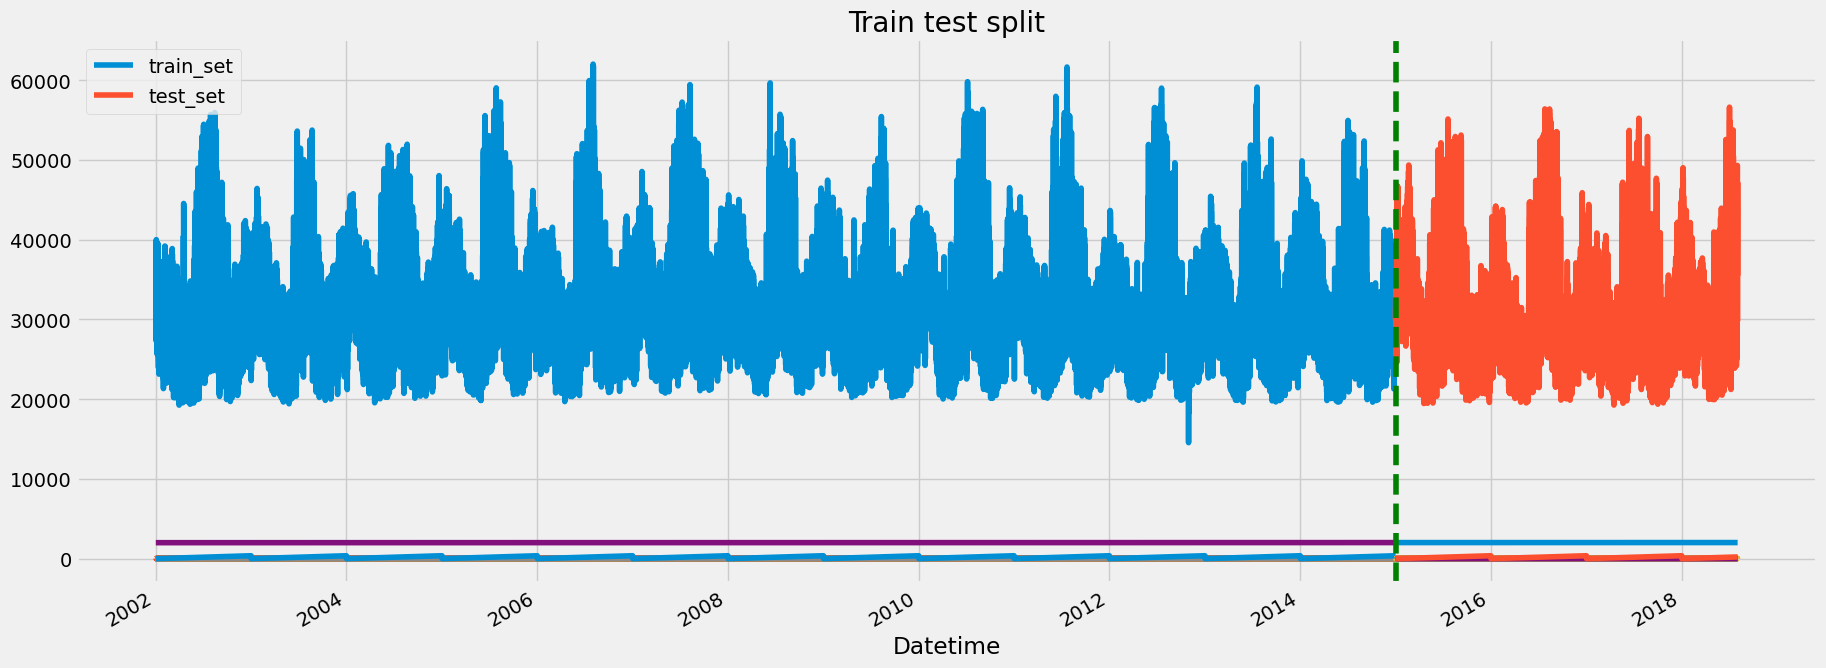

In [43]:
fig,ax = plt.subplots(figsize=(20,8))
train_set.plot(ax=ax)
test_set.plot(ax=ax)
ax.axvline('2015-01-01',color='green',ls='--')
plt.legend(['train_set','test_set'])
plt.title('Train test split')
plt.show()

In [52]:
x_train = train_set.drop('PJME_MW',axis=1)
y_train = train_set.PJME_MW

x_test = test_set.drop('PJME_MW',axis=1)
y_test = test_set.PJME_MW

In [53]:
model = XGBRegressor(n_estimator=1000,early_stopping_round=50)

In [54]:
model.fit(x_train,y_train)
model.score(x_train,y_train)
pred = model.predict(x_test)
merror = mean_squared_error(pred,y_test)
np.sqrt(merror)

[01:19:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.



4282.278248188247

In [17]:
x = data.drop('PJME_MW',axis=1)
y = data.PJME_MW

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.8,random_state=42)

In [51]:
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)
pred = model.predict(xtest)
mean = mean_squared_error(pred,ytest)
np.sqrt(mean)

[01:17:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.



1861.7365958389885